In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
proj = '93Nb'
trg = '63Cu'
cn = '156Yb'
bf = 1.0
ch = '3pxn'
sigr = 3.0

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb

E_lab  E*/MeV  144Ho  145Ho    146Ho  147Ho  148Ho  149Ho         150Ho  \
0   314.471    27.0    0.0    0.0  0.00000   0.00   0.00   0.00  9.560000e-12   
1   316.947    28.0    0.0    0.0  0.00000   0.00   0.00   0.00  2.690000e-10   
2   319.424    29.0    0.0    0.0  0.00000   0.00   0.00   0.00  5.630000e-09   
3   321.900    30.0    0.0    0.0  0.00000   0.00   0.00   0.00  9.380000e-08   
4   324.376    31.0    0.0    0.0  0.00000   0.00   0.00   0.00  1.270000e-06   
..      ...     ...    ...    ...      ...    ...    ...    ...           ...   
60  463.043    87.0    0.0    0.0  0.00245   1.23   7.65   8.86  3.590000e+01   
61  465.519    88.0    0.0    0.0  0.00427   1.39   7.43  10.40  3.650000e+01   
62  467.995    89.0    0.0    0.0  0.00653   1.53   7.22  12.00  3.630000e+01   
63  470.471    90.0    0.0    0.0  0.01050   1.68   6.93  13.60  3.580000e+01   
64  472.947    91.0    0.0    0.0  0.01610   1.83   6.62  15.30  3.390000e+01   

           151Ho  152Ho         153Ho  
0   3.790000e-08   0.00  7.770000e-11  
1   2.580000e-07   0.00  1.430000e-09  
2   1.640000e-06   0.00  2.130000e-08  
3   9.820000e-06   0.00  2.630000e-07  
4   5.500000e-05   0.00  2.710000e-06  
..           ...    ...           ...  
60  2.560000e+01   3.45  6.840000e-02  
61  2.360000e+01   2.93  5.190000e-02  
62  2.130000e+01   2.48  3.910000e-02  
63  1.930000e+01   2.08  2.930000e-02  
64  1.770000e+01   1.73  2.180000e-02  

[65 rows x 12 columns]

## Experimental values with errors

In [107]:
# Andreyev ub
# e_lab = [175.6,180,182,185.5,189.3,195,198.5,200,202.9,207,211,219,224.8,231.5,237,241.4,248.9,256.3,263.8,271.3,279.5]
# exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,1,1.4,3,3.5,1.7,1,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,15,35,28,25,31,16,4,1.5,0.8,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,35,100,300,350,370,160,150,35,56,17,9,np.nan,np.nan,np.nan], [np.nan,np.nan,100,460,850,1170,1930,1620,1950,800,320,100,20,28,np.nan,10,np.nan,np.nan,np.nan,np.nan,np.nan], [2430,9300,8250,11500,8800,4650,2600,1700,1250,350,210,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
# exp = np.array(exp)/1e3

## Scaling of the values to mb, ub or nb

In [108]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb

dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale

dfm10.describe()
# exp = exp * scale

E_lab      E*/MeV          CS
count  650.000000  650.000000  650.000000
mean   393.709323   59.000000    4.440817
std     46.493218   18.776112    8.429176
min    314.471000   27.000000    0.000000
25%    354.090000   43.000000    0.000000
50%    393.709000   59.000000    0.006450
75%    433.328000   75.000000    4.517500
max    472.947000   91.000000   38.400000

## Plotting

/tmp/ipykernel_23026/441421288.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:]))], palette=colors)
/tmp/ipykernel_23026/441421288.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:]))], linestyle='--', legend=None, palette=colors, alpha=0.4)


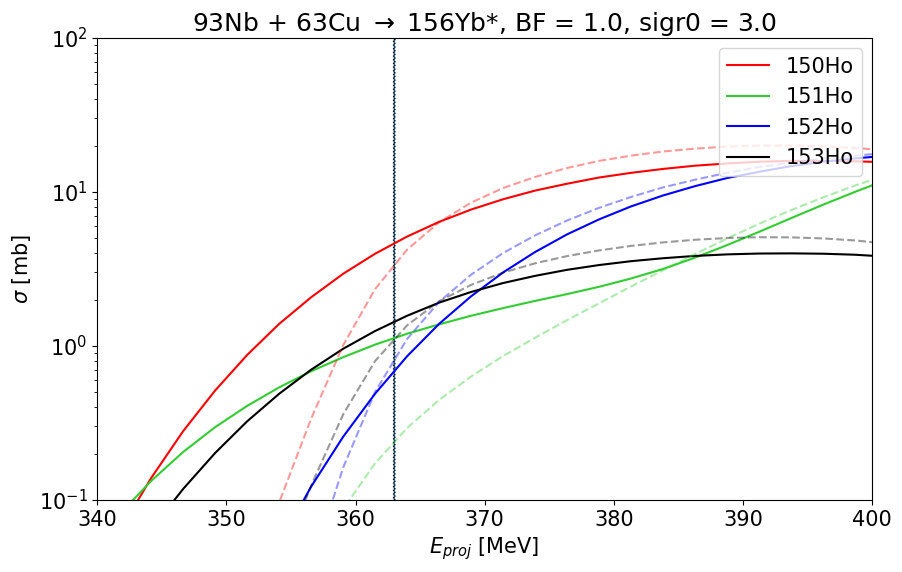

In [109]:
colors = ['red', 'limegreen', 'blue', 'black', 'gold', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plt.rcParams.update({'font.size': 15})

plot_from = 6
plot_to = 1

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:]))], palette=colors)
plt.semilogy()
ylow = 1e-1
yhigh = 1e2
plt.ylim(ylow, yhigh)
plt.xlim(340, 400)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ', sigr0 = ' + str(sigr), va='top')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:]))], linestyle='--', legend=None, palette=colors, alpha=0.4)

plt.arrow(363, ylow, 0, yhigh/ylow, linestyle=':', width=0.1)

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')